In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

from plotka import plot_decision_regions

In [2]:
class Perceptron(object):

    def __init__(self, learningRate=0.01, epochs=100):
        self.lr = learningRate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for input, target in zip(X,y):
                
                output = (target - self.predict(input)) * self.lr
                
                self.weights += output * input
                self.bias += output
                
                error += int(output != 0.0)
            
            self.errors.append(error)
        
        return self

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
class Multiclass(object):

    def __init__(self, ppn1, ppn2):
        self.ppn1 = ppn1
        self.ppn2 = ppn2

    def predict(self, X):
        result = []
        for data in X:
            if self.ppn1.predict(data) == 1:
                result.append(0)
            elif self.ppn2.predict(data) == 1:
                result.append(1)
            else:
                result.append(2)

        return np.array(result)

In [4]:
def main():
    
    r8 = float(input('Learning rate: '))
    epochs = int(input('Epochs: '))
    
    iris = datasets.load_iris()
    
    X = iris.data[:, [2, 3]]
    y = iris.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    y1 = y_train.copy()
    y2 = y_train.copy()
    y3 = y_train.copy()
    
    y1[(y1 != 0)] = -1
    y1[y1 == 0] = 1
    ppn1 = Perceptron(r8, epochs)
    ppn1.fit(X_train, y1)

    y2[(y2 != 1)] = -1
    y2[y2 == 1] = 1
    ppn2 = Perceptron(r8, epochs)
    ppn2.fit(X_train, y2)

    y3[(y3 != 2)] = -1
    y3[y3 == 2] = 1
    ppn3 = Perceptron(r8, epochs)
    ppn3.fit(X_train, y3)

    multi = Multiclass(ppn1,ppn3)
    print(multi.predict(X_test))

    plot_decision_regions(X=X_test, y=y_test, classifier=multi)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()

Learning rate: .01
Epochs: 1000
[1 0 0 2 2 2 1 2 1 0 0 2 0 2 0 2 1 2 2 1 1 0 2 1 2 2 2 1 2 1 0 0 2 2 1 1 0
 0 0 2 1 1 2 0 0]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


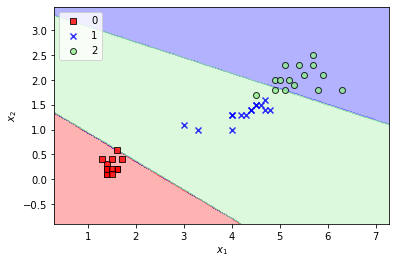

In [5]:
if __name__ == '__main__':
    main()